## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping

earlystop = []
for pati in [5, 10, 25]:  # patience
    earlystop.append(EarlyStopping(monitor="val_acc", patience=pati, verbose=1))

In [8]:
results = {}
for idx, es in enumerate(earlystop):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[es]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "earlystop_%s" % (str(idx))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

50000/50000 [==============================] - 2s 33us/step - loss: 1.4471 - acc: 0.4956 - val_loss: 1.5714 - val_acc: 0.4486
Epoch 7/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.4055 - acc: 0.5096 - val_loss: 1.5513 - val_acc: 0.4572
Epoch 8/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.3707 - acc: 0.5232 - val_loss: 1.5401 - val_acc: 0.4599
Epoch 9/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.3384 - acc: 0.5336 - val_loss: 1.5067 - val_acc: 0.4720
Epoch 10/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.3072 - acc: 0.5474 - val_loss: 1.5078 - val_acc: 0.4668
Epoch 11/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.2787 - acc: 0.5559 - val_loss: 1.4987 - val_acc: 0.4786
Epoch 12/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.2532 - acc: 0.5662 - val_loss: 1.4861 - val_acc: 0.4768
Epoch 13/50
50000/50000 [========================

Epoch 14/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2122 - acc: 0.5846 - val_loss: 1.4757 - val_acc: 0.4812
Epoch 15/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.1872 - acc: 0.5912 - val_loss: 1.4841 - val_acc: 0.4816
Epoch 16/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.1615 - acc: 0.6003 - val_loss: 1.4706 - val_acc: 0.4849
Epoch 17/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.1395 - acc: 0.6100 - val_loss: 1.4629 - val_acc: 0.4878
Epoch 18/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.1171 - acc: 0.6182 - val_loss: 1.4627 - val_acc: 0.4892
Epoch 19/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.0961 - acc: 0.6262 - val_loss: 1.4709 - val_acc: 0.4888
Epoch 20/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.0754 - acc: 0.6331 - val_loss: 1.4723 - val_acc: 0.4906
Epoch 21/50
50000/50000 [=========

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_model_score(results):
    color_bar = ["r", "g", "b", "y", "m", "k"] 
    plt.figure(figsize=(10,8))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label='train-'+cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label='valid-'+cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


    plt.figure(figsize=(10,8))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label='train-'+cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label='valid-'+cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

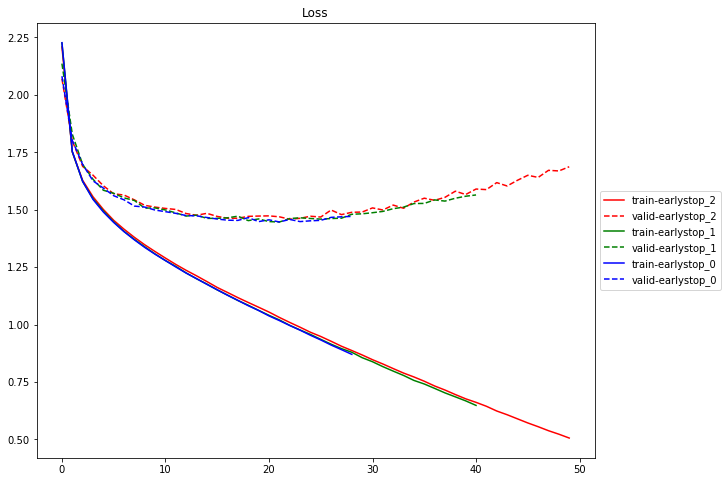

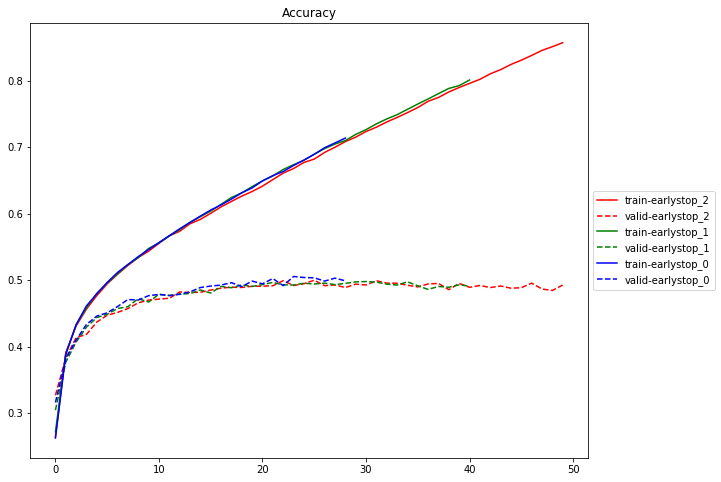

In [10]:
plot_model_score(results)

In [11]:
for idx, es in enumerate(earlystop):
    exp_name_tag = "earlystop_%s" % (str(idx))
    print("%s, the max epoch is %d." % (exp_name_tag, len(results[exp_name_tag]['train-loss'])))

earlystop_0, the max epoch is 29.
earlystop_1, the max epoch is 41.
earlystop_2, the max epoch is 50.
